### Cab-Driver Agent

In [1]:
# Importing libraries
import numpy as np
import random
import math
from collections import deque
import collections
import pickle

# for building DQN model
from keras import layers
from keras import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

# for plotting graphs
import matplotlib.pyplot as plt

# Import the environment
from Env import CabDriver
env = CabDriver()

Using TensorFlow backend.


#### Defining Time Matrix

In [2]:
# Loading the time matrix provided
Time_matrix = np.load("TM.npy")

#### Tracking the state-action pairs for checking convergence


In [3]:
def Q_state(state):
    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [4]:
Q_dict = collections.defaultdict(dict)
States_track = collections.defaultdict(dict)

In [5]:
#function taken from previous assignment
def track_state():
    temp = [((1,0,3),(2,2)),((3,5,2),(1,2)),((3,3,3),(2,3))] 
    
    for val in temp:
        state= Q_state(val[0])
        action = val[1]
        states_track[state][action]=[]

In [6]:
# function take from the previous assignment
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [7]:
#Defining a function to save the Q-dictionary as a pickle file
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

### Agent Class

If you are using this framework, you need to fill the following to complete the following code block:
1. State and Action Size
2. Hyperparameters
3. Create a neural-network model in function 'build_model()'
4. Define epsilon-greedy strategy in function 'get_action()'
5. Complete the function 'append_sample()'. This function appends the recent experience tuple <state, action, reward, new-state> to the memory
6. Complete the 'train_model()' function with following logic:
   - If the memory size is greater than mini-batch size, you randomly sample experiences from memory as per the mini-batch size and do the following:
      - Initialise your input and output batch for training the model
      - Calculate the target Q value for each sample: reward + gamma*max(Q(s'a,))
      - Get Q(s', a) values from the last trained model
      - Update the input batch as your encoded state and output batch as your Q-values
      - Then fit your DQN model using the updated input and output batch.

In [8]:
class DQNAgent:
    def __init__(self, state_size, action_size):
        # Define size of state and action
        self.state_size = state_size
        self.action_size = action_size

        # Write here: Specify you hyper parameters for the DQN
        self.discount_factor = 0.95
        self.learning_rate = 0.01        
        self.epsilon_max = 1
        self.epsilon_decay = .95
        self.epsilon_min = 0.01
        
        self.batch_size = 32        
        # create replay memory using deque
        self.memory = deque(maxlen=2000)

        # create main model and target model
        self.model = self.build_model()
        self.plot_state = []
        self.track_state = []

    # approximate Q function using Neural Network
    def build_model(self):
        model = Sequential()
        # Write your code here: Add layers to your neural nets   
        model.add(Dense(64, activation='relu', input_dim=self.state_size))
        model.add(Dense(32, activation='relu'))
        
        model.add(Dense(self.action_size, activation='relu'))
        
        model.compile(loss='mse',optimizer=Adam(lr=self.learning_rate))
        model.summary
        return model



    def get_action(self, state):
    # Write your code here:
        action_space, state_space = env.requests(state)
        if np.random.rand() <= self.epsilon_max:
            act = random.choice(state_space)
            return act
        else:
            encoded_state = env.state_encod_arch1(state)
            re_state = encoded_state.reshape(1, self.state_size)
            qvalue1 = self.model.predict(re_state)
            qvalue2 = [qvalue1[0][index] for index in action_space]
            
            if not action_space:
                return state_space[0]
            else:
                return state_space[np.argmax(qvalue2)]
    # get action from model using epsilon-greedy policy
    # Decay in ε after we generate each sample from the environment       
        
        
        
        
        


    def append_sample(self, state, action, reward, next_state, done):
    # Write your code here:
        self.memory.append((state, action, reward, next_state, done))
    # save sample <s,a,r,s'> to the replay memory
    
    
    
    # pick samples randomly from replay memory (with batch_size) and train the network
    def train_model(self):
        
        if len(self.memory) > self.batch_size:
            # Sample batch from the memory
            mini_batch = random.sample(self.memory, self.batch_size)
            update_output =np.zeros((self.batch_size, self.state_size)) # write here
            update_input = np.zeros((self.batch_size, self.state_size)) # write here
            
            actions, rewards, terminals = [], [], []
            
            for i in range(self.batch_size):
                state, action, reward, next_state, terminal = mini_batch[i]
                update_input[i] = state
                update_output[i] = next_state
                terminals.append(terminal)
                actions.append(action)
                rewards.append(reward)
                
                # Write your code from here
                
                # 1. Predict the target from earlier model
                
            target = self.model.predict(update_input)
                # 2. Get the target for the Q-network
            target_val = self.model.predict(update_output)
                
                #3. Update your 'update_output' and 'update_input' batch
            for i in range(self.batch_size):
                if terminals[i]:
                    target[i][actions[i]] = rewards[i]
                else:
                    target[i][actions[i]] = rewards[i] +self.discount_factor * np.max(target_val[i])
                
                
        # 4. Fit your model and track the loss values
            self.model.fit(update_input, target, batch_size=self.batch_size, epochs=1)

    def save_tracking_states(self):
        # Use the model to predict the q_value of the state we are tacking.
        q_value = self.model.predict(self.track_state)

        # Grab the q_value of the action index that we are tracking.
        self.plot_state.append(q_value[0][2])    
        
    def save(self, name):
        self.model.save(name)

In [9]:
Episodes = 3000

### DQN block

In [10]:
agent = DQNAgent(action_size=len(env.action_space) , state_size=len(env.state_space[0]))
episode_reward, episodes = [], []

for episode in range(Episodes):

    # Write code here
    score=0
    action_space, state_space, state_init = env.reset()
    terminal_state = False
    # Call the environment
    # Call all the initialised variables of the environment
    

    #Call the DQN agent
    
    
    while not terminal_state:
        
        # Write your code here
        # 1. Pick epsilon-greedy action from possible actions for the current state
        action= agent.get_action(state_init)        
        # 2. Evaluate your reward and next state
        reward = env.reward_func(state_init, action, Time_matrix)
        next_state, terminal_state = env.next_state_func(state_init, action, Time_matrix)

        # 3. Append the experience to the memory
        agent.append_sample(state_init, action, reward, next_state, terminal_state)

        # 4. Train the model by calling function agent.train_model
        agent.train_model()

        # 5. Keep a track of rewards, Q-values, loss
        score += reward
        state_init = next_state
        
    episode_reward.append(score)
    episodes.append(episode)

    if agent.epsilon_max > agent.epsilon_min:
        agent.epsilon_max = agent.epsilon_max * agent.epsilon_decay
    
    
    print(f"Episode {episode}, Reward {score}, Memory Length {len(agent.memory)}, Epsilon {agent.epsilon_max}")
    
    
    if episode % 50 == 0:#save every 50th episode
        save_tracking_states() 
        save_obj(States_track,'States_tracked') 
        agent.save(name="Taxi_RL_model.h5")

Epoch 1/1
32/32 [==============================] - 1s 38ms/step - loss: 20.5122
Epoch 1/1
32/32 [==============================] - 0s 163us/step - loss: 21.4446
Epoch 1/1
32/32 [==============================] - 0s 167us/step - loss: 22.3872
Epoch 1/1
32/32 [==============================] - 0s 151us/step - loss: 20.5894
Epoch 1/1
32/32 [==============================] - 0s 215us/step - loss: 19.3729
Epoch 1/1
32/32 [==============================] - 0s 641us/step - loss: 19.8779
Epoch 1/1
32/32 [==============================] - 0s 356us/step - loss: 17.7125
Epoch 1/1
32/32 [==============================] - 0s 378us/step - loss: 19.2983
Epoch 1/1
32/32 [==============================] - 0s 104us/step - loss: 19.2466
Epoch 1/1
32/32 [==============================] - 0s 120us/step - loss: 17.5800
Epoch 1/1
32/32 [==============================] - 0s 217us/step - loss: 19.5679
Epoch 1/1
32/32 [==============================] - 0s 228us/step - loss: 15.6075
Epoch 1/1
32/32 [============

Epoch 1/1
32/32 [==============================] - 0s 133us/step - loss: 80.8429
Epoch 1/1
32/32 [==============================] - 0s 115us/step - loss: 51.6826
Episode 0, Reward -410.0, Memory Length 135, Epsilon 0.95
Epoch 1/1
32/32 [==============================] - 0s 79us/step - loss: 99.6546
Epoch 1/1
32/32 [==============================] - 0s 130us/step - loss: 94.7151
Epoch 1/1
32/32 [==============================] - 0s 119us/step - loss: 75.3727
Epoch 1/1
32/32 [==============================] - 0s 137us/step - loss: 92.6694
Epoch 1/1
32/32 [==============================] - 0s 117us/step - loss: 48.7911
Epoch 1/1
32/32 [==============================] - 0s 94us/step - loss: 80.0031
Epoch 1/1
32/32 [==============================] - 0s 82us/step - loss: 52.2487
Epoch 1/1
32/32 [==============================] - 0s 95us/step - loss: 41.1638
Epoch 1/1
32/32 [==============================] - 0s 106us/step - loss: 41.3262
Epoch 1/1
32/32 [==============================] - 0s 1

Epoch 1/1
32/32 [==============================] - 0s 211us/step - loss: 37.8852
Epoch 1/1
32/32 [==============================] - 0s 167us/step - loss: 18.2193
Epoch 1/1
32/32 [==============================] - 0s 266us/step - loss: 30.5307
Epoch 1/1
32/32 [==============================] - 0s 149us/step - loss: 18.8791
Epoch 1/1
32/32 [==============================] - 0s 164us/step - loss: 24.8345
Epoch 1/1
32/32 [==============================] - 0s 113us/step - loss: 22.2077
Epoch 1/1
32/32 [==============================] - 0s 111us/step - loss: 26.0511
Epoch 1/1
32/32 [==============================] - 0s 214us/step - loss: 17.6201
Epoch 1/1
32/32 [==============================] - 0s 282us/step - loss: 29.9699
Epoch 1/1
32/32 [==============================] - 0s 119us/step - loss: 32.3779
Epoch 1/1
32/32 [==============================] - 0s 119us/step - loss: 25.3383
Epoch 1/1
32/32 [==============================] - 0s 110us/step - loss: 21.1501
Epoch 1/1
32/32 [===========

Epoch 1/1
32/32 [==============================] - 0s 205us/step - loss: 15.6630
Epoch 1/1
32/32 [==============================] - 0s 218us/step - loss: 14.0824
Epoch 1/1
32/32 [==============================] - 0s 246us/step - loss: 25.3935
Epoch 1/1
32/32 [==============================] - 0s 103us/step - loss: 25.2911
Epoch 1/1
32/32 [==============================] - 0s 122us/step - loss: 25.3142
Epoch 1/1
32/32 [==============================] - 0s 156us/step - loss: 27.1891
Epoch 1/1
32/32 [==============================] - 0s 159us/step - loss: 19.8635
Epoch 1/1
32/32 [==============================] - 0s 114us/step - loss: 27.6571
Epoch 1/1
32/32 [==============================] - 0s 128us/step - loss: 24.8881
Epoch 1/1
32/32 [==============================] - 0s 265us/step - loss: 33.1487
Epoch 1/1
32/32 [==============================] - 0s 111us/step - loss: 22.9897
Epoch 1/1
32/32 [==============================] - 0s 312us/step - loss: 20.6490
Epoch 1/1
32/32 [===========

Epoch 1/1
32/32 [==============================] - 0s 110us/step - loss: 18.3416
Epoch 1/1
32/32 [==============================] - 0s 195us/step - loss: 18.1201
Epoch 1/1
32/32 [==============================] - 0s 172us/step - loss: 15.4876
Epoch 1/1
32/32 [==============================] - 0s 153us/step - loss: 26.8209
Epoch 1/1
32/32 [==============================] - 0s 175us/step - loss: 15.5213
Epoch 1/1
32/32 [==============================] - 0s 136us/step - loss: 11.2890
Epoch 1/1
32/32 [==============================] - 0s 134us/step - loss: 22.2069
Epoch 1/1
32/32 [==============================] - 0s 113us/step - loss: 11.6974
Epoch 1/1
32/32 [==============================] - 0s 123us/step - loss: 18.5030
Epoch 1/1
32/32 [==============================] - 0s 148us/step - loss: 17.9194
Epoch 1/1
32/32 [==============================] - 0s 122us/step - loss: 18.6528
Epoch 1/1
32/32 [==============================] - 0s 133us/step - loss: 20.1684
Epoch 1/1
32/32 [===========

Epoch 1/1
32/32 [==============================] - 0s 97us/step - loss: 30.6584
Epoch 1/1
32/32 [==============================] - 0s 97us/step - loss: 13.6520
Epoch 1/1
32/32 [==============================] - 0s 97us/step - loss: 11.1812
Epoch 1/1
32/32 [==============================] - 0s 147us/step - loss: 27.2438
Epoch 1/1
32/32 [==============================] - 0s 102us/step - loss: 15.0532
Epoch 1/1
32/32 [==============================] - 0s 168us/step - loss: 15.5976
Epoch 1/1
32/32 [==============================] - 0s 174us/step - loss: 25.2934
Epoch 1/1
32/32 [==============================] - 0s 119us/step - loss: 20.4015
Epoch 1/1
32/32 [==============================] - 0s 188us/step - loss: 32.9922
Epoch 1/1
32/32 [==============================] - 0s 213us/step - loss: 22.6363
Epoch 1/1
32/32 [==============================] - 0s 102us/step - loss: 19.7429
Epoch 1/1
32/32 [==============================] - 0s 105us/step - loss: 22.0110
Epoch 1/1
32/32 [==============

Epoch 1/1
32/32 [==============================] - 0s 261us/step - loss: 23.0611
Epoch 1/1
32/32 [==============================] - 0s 167us/step - loss: 18.2739
Epoch 1/1
32/32 [==============================] - 0s 124us/step - loss: 11.3051
Epoch 1/1
32/32 [==============================] - 0s 124us/step - loss: 22.9575
Epoch 1/1
32/32 [==============================] - 0s 81us/step - loss: 22.0368
Epoch 1/1
32/32 [==============================] - 0s 148us/step - loss: 29.4224
Epoch 1/1
32/32 [==============================] - 0s 151us/step - loss: 19.2739
Epoch 1/1
32/32 [==============================] - 0s 120us/step - loss: 20.7424
Epoch 1/1
32/32 [==============================] - 0s 109us/step - loss: 38.3304
Epoch 1/1
32/32 [==============================] - 0s 125us/step - loss: 28.4884
Epoch 1/1
32/32 [==============================] - 0s 139us/step - loss: 13.9409
Epoch 1/1
32/32 [==============================] - 0s 118us/step - loss: 20.4897
Epoch 1/1
32/32 [============

Epoch 1/1
32/32 [==============================] - 0s 135us/step - loss: 28.2910
Epoch 1/1
32/32 [==============================] - 0s 144us/step - loss: 29.9060
Epoch 1/1
32/32 [==============================] - 0s 118us/step - loss: 16.3773
Epoch 1/1
32/32 [==============================] - 0s 89us/step - loss: 50.2072
Epoch 1/1
32/32 [==============================] - 0s 108us/step - loss: 42.7798
Epoch 1/1
32/32 [==============================] - 0s 124us/step - loss: 26.8169
Epoch 1/1
32/32 [==============================] - 0s 97us/step - loss: 39.6356
Epoch 1/1
32/32 [==============================] - 0s 103us/step - loss: 42.9664
Epoch 1/1
32/32 [==============================] - 0s 174us/step - loss: 52.3448
Epoch 1/1
32/32 [==============================] - 0s 153us/step - loss: 43.8792
Epoch 1/1
32/32 [==============================] - 0s 196us/step - loss: 34.1969
Epoch 1/1
32/32 [==============================] - 0s 247us/step - loss: 47.2712
Epoch 1/1
32/32 [=============

Epoch 1/1
32/32 [==============================] - 0s 129us/step - loss: 15.3042
Epoch 1/1
32/32 [==============================] - 0s 99us/step - loss: 15.8372
Epoch 1/1
32/32 [==============================] - 0s 126us/step - loss: 11.2540
Epoch 1/1
32/32 [==============================] - 0s 114us/step - loss: 22.1428
Epoch 1/1
32/32 [==============================] - 0s 97us/step - loss: 19.6839
Epoch 1/1
32/32 [==============================] - 0s 163us/step - loss: 12.7133
Epoch 1/1
32/32 [==============================] - 0s 88us/step - loss: 12.2798
Epoch 1/1
32/32 [==============================] - 0s 90us/step - loss: 18.8815
Epoch 1/1
32/32 [==============================] - 0s 167us/step - loss: 17.2635
Episode 5, Reward -201.0, Memory Length 851, Epsilon 0.7350918906249998
Epoch 1/1
32/32 [==============================] - 0s 138us/step - loss: 19.9924
Epoch 1/1
32/32 [==============================] - 0s 104us/step - loss: 16.6196
Epoch 1/1
32/32 [========================

Epoch 1/1
32/32 [==============================] - 0s 139us/step - loss: 72.8980
Epoch 1/1
32/32 [==============================] - 0s 96us/step - loss: 33.6210
Epoch 1/1
32/32 [==============================] - 0s 132us/step - loss: 234.2137
Epoch 1/1
32/32 [==============================] - 0s 159us/step - loss: 131.7041
Epoch 1/1
32/32 [==============================] - 0s 118us/step - loss: 196.3665
Epoch 1/1
32/32 [==============================] - 0s 89us/step - loss: 92.1853
Epoch 1/1
32/32 [==============================] - 0s 162us/step - loss: 102.4228
Epoch 1/1
32/32 [==============================] - 0s 115us/step - loss: 96.4191
Epoch 1/1
32/32 [==============================] - 0s 92us/step - loss: 61.3646
Epoch 1/1
32/32 [==============================] - 0s 137us/step - loss: 157.8298
Epoch 1/1
32/32 [==============================] - 0s 102us/step - loss: 92.9949
Epoch 1/1
32/32 [==============================] - 0s 120us/step - loss: 128.0965
Epoch 1/1
32/32 [========

Epoch 1/1
32/32 [==============================] - 0s 163us/step - loss: 3860.2300
Epoch 1/1
32/32 [==============================] - 0s 100us/step - loss: 4691.7354
Epoch 1/1
32/32 [==============================] - 0s 109us/step - loss: 38226.6172
Epoch 1/1
32/32 [==============================] - 0s 149us/step - loss: 31863.1797
Epoch 1/1
32/32 [==============================] - 0s 100us/step - loss: 11566.9922
Epoch 1/1
32/32 [==============================] - 0s 104us/step - loss: 3529.5850
Epoch 1/1
32/32 [==============================] - 0s 104us/step - loss: 2346.4136
Epoch 1/1
32/32 [==============================] - 0s 149us/step - loss: 3044.4810
Epoch 1/1
32/32 [==============================] - 0s 81us/step - loss: 1582.4392
Epoch 1/1
32/32 [==============================] - 0s 102us/step - loss: 7309.2856
Epoch 1/1
32/32 [==============================] - 0s 107us/step - loss: 2379.4294
Epoch 1/1
32/32 [==============================] - 0s 84us/step - loss: 3629.8418
Epo

Epoch 1/1
32/32 [==============================] - 0s 209us/step - loss: 847.7320
Epoch 1/1
32/32 [==============================] - 0s 120us/step - loss: 5200.4121
Epoch 1/1
32/32 [==============================] - 0s 208us/step - loss: 546.3240
Epoch 1/1
32/32 [==============================] - 0s 88us/step - loss: 1624.3069
Epoch 1/1
32/32 [==============================] - 0s 115us/step - loss: 1723.4575
Episode 7, Reward -375.0, Memory Length 1146, Epsilon 0.6634204312890623
Epoch 1/1
32/32 [==============================] - 0s 144us/step - loss: 3159.5891
Epoch 1/1
32/32 [==============================] - 0s 94us/step - loss: 650.6033
Epoch 1/1
32/32 [==============================] - 0s 84us/step - loss: 942.4994
Epoch 1/1
32/32 [==============================] - 0s 164us/step - loss: 960.4630
Epoch 1/1
32/32 [==============================] - 0s 98us/step - loss: 1121.2861
Epoch 1/1
32/32 [==============================] - 0s 93us/step - loss: 795.6786
Epoch 1/1
32/32 [========

Epoch 1/1
32/32 [==============================] - 0s 160us/step - loss: 255.9056
Epoch 1/1
32/32 [==============================] - 0s 135us/step - loss: 476.1484
Epoch 1/1
32/32 [==============================] - 0s 239us/step - loss: 330.4580
Epoch 1/1
32/32 [==============================] - 0s 175us/step - loss: 742.5295
Epoch 1/1
32/32 [==============================] - 0s 172us/step - loss: 520.9465
Epoch 1/1
32/32 [==============================] - 0s 136us/step - loss: 340.3232
Epoch 1/1
32/32 [==============================] - 0s 125us/step - loss: 339.5905
Epoch 1/1
32/32 [==============================] - 0s 126us/step - loss: 696.5029
Epoch 1/1
32/32 [==============================] - 0s 167us/step - loss: 523.0220
Epoch 1/1
32/32 [==============================] - 0s 135us/step - loss: 435.6667
Epoch 1/1
32/32 [==============================] - 0s 138us/step - loss: 395.0721
Epoch 1/1
32/32 [==============================] - 0s 108us/step - loss: 209.3832
Epoch 1/1
32/32 

Epoch 1/1
32/32 [==============================] - 0s 139us/step - loss: 207.4528
Epoch 1/1
32/32 [==============================] - 0s 163us/step - loss: 214.2290
Epoch 1/1
32/32 [==============================] - 0s 161us/step - loss: 166.5601
Epoch 1/1
32/32 [==============================] - 0s 176us/step - loss: 173.4572
Epoch 1/1
32/32 [==============================] - 0s 131us/step - loss: 92.1922
Epoch 1/1
32/32 [==============================] - 0s 204us/step - loss: 100.9006
Epoch 1/1
32/32 [==============================] - 0s 134us/step - loss: 119.3633
Epoch 1/1
32/32 [==============================] - 0s 129us/step - loss: 77.6257
Epoch 1/1
32/32 [==============================] - 0s 118us/step - loss: 126.8431
Epoch 1/1
32/32 [==============================] - 0s 107us/step - loss: 173.9530
Epoch 1/1
32/32 [==============================] - 0s 160us/step - loss: 116.2795
Epoch 1/1
32/32 [==============================] - 0s 178us/step - loss: 107.2366
Epoch 1/1
32/32 [=

Epoch 1/1
32/32 [==============================] - 0s 95us/step - loss: 341.0340
Epoch 1/1
32/32 [==============================] - 0s 104us/step - loss: 3735.8210
Epoch 1/1
32/32 [==============================] - 0s 102us/step - loss: 365.3375
Epoch 1/1
32/32 [==============================] - 0s 175us/step - loss: 472.1245
Epoch 1/1
32/32 [==============================] - 0s 88us/step - loss: 352.2242
Epoch 1/1
32/32 [==============================] - 0s 125us/step - loss: 384.9674
Epoch 1/1
32/32 [==============================] - 0s 132us/step - loss: 6614.3330
Epoch 1/1
32/32 [==============================] - 0s 122us/step - loss: 554.7131
Epoch 1/1
32/32 [==============================] - 0s 138us/step - loss: 4754.2910
Epoch 1/1
32/32 [==============================] - 0s 171us/step - loss: 484.2335
Epoch 1/1
32/32 [==============================] - 0s 114us/step - loss: 436.4236
Epoch 1/1
32/32 [==============================] - 0s 142us/step - loss: 606.7086
Epoch 1/1
32/32

Epoch 1/1
32/32 [==============================] - 0s 133us/step - loss: 221.0349
Epoch 1/1
32/32 [==============================] - 0s 124us/step - loss: 282.0397
Epoch 1/1
32/32 [==============================] - 0s 159us/step - loss: 3849.1348
Epoch 1/1
32/32 [==============================] - 0s 132us/step - loss: 333.6784
Epoch 1/1
32/32 [==============================] - 0s 111us/step - loss: 218.9229
Epoch 1/1
32/32 [==============================] - 0s 124us/step - loss: 253.2009
Epoch 1/1
32/32 [==============================] - 0s 101us/step - loss: 285.5583
Epoch 1/1
32/32 [==============================] - 0s 160us/step - loss: 341.3615
Epoch 1/1
32/32 [==============================] - 0s 88us/step - loss: 412.9339
Epoch 1/1
32/32 [==============================] - 0s 157us/step - loss: 4813.4448
Epoch 1/1
32/32 [==============================] - 0s 164us/step - loss: 4426.9844
Epoch 1/1
32/32 [==============================] - 0s 141us/step - loss: 353.8049
Epoch 1/1
32/3

Epoch 1/1
32/32 [==============================] - 0s 158us/step - loss: 158.0517
Epoch 1/1
32/32 [==============================] - 0s 118us/step - loss: 121.7344
Epoch 1/1
32/32 [==============================] - 0s 168us/step - loss: 175.8524
Epoch 1/1
32/32 [==============================] - 0s 180us/step - loss: 139.6074
Epoch 1/1
32/32 [==============================] - 0s 144us/step - loss: 146.1401
Epoch 1/1
32/32 [==============================] - 0s 114us/step - loss: 181.3618
Epoch 1/1
32/32 [==============================] - 0s 172us/step - loss: 102.3464
Epoch 1/1
32/32 [==============================] - 0s 132us/step - loss: 131.8499
Epoch 1/1
32/32 [==============================] - 0s 133us/step - loss: 204.6414
Epoch 1/1
32/32 [==============================] - 0s 104us/step - loss: 120.2882
Epoch 1/1
32/32 [==============================] - 0s 216us/step - loss: 121.3550
Epoch 1/1
32/32 [==============================] - 0s 122us/step - loss: 288.0685
Epoch 1/1
32/32 

Epoch 1/1
32/32 [==============================] - 0s 98us/step - loss: 7350.1196
Epoch 1/1
32/32 [==============================] - 0s 179us/step - loss: 199.0429
Epoch 1/1
32/32 [==============================] - 0s 367us/step - loss: 434.9232
Epoch 1/1
32/32 [==============================] - 0s 145us/step - loss: 224.5349
Epoch 1/1
32/32 [==============================] - 0s 89us/step - loss: 3232.3896
Epoch 1/1
32/32 [==============================] - 0s 116us/step - loss: 327.0871
Epoch 1/1
32/32 [==============================] - 0s 138us/step - loss: 502.9271
Epoch 1/1
32/32 [==============================] - 0s 148us/step - loss: 5033.0244
Epoch 1/1
32/32 [==============================] - 0s 134us/step - loss: 622.9314
Epoch 1/1
32/32 [==============================] - 0s 196us/step - loss: 6010.1357
Epoch 1/1
32/32 [==============================] - 0s 129us/step - loss: 351.2655
Epoch 1/1
32/32 [==============================] - 0s 85us/step - loss: 346.8561
Epoch 1/1
32/32

Epoch 1/1
32/32 [==============================] - 0s 224us/step - loss: 123.9741
Epoch 1/1
32/32 [==============================] - 0s 177us/step - loss: 186.4937
Epoch 1/1
32/32 [==============================] - 0s 159us/step - loss: 196.8421
Epoch 1/1
32/32 [==============================] - 0s 84us/step - loss: 1180.1436
Epoch 1/1
32/32 [==============================] - 0s 145us/step - loss: 217.2097
Epoch 1/1
32/32 [==============================] - 0s 92us/step - loss: 2262.3362
Epoch 1/1
32/32 [==============================] - 0s 89us/step - loss: 148.0714
Epoch 1/1
32/32 [==============================] - 0s 98us/step - loss: 2242.6797
Epoch 1/1
32/32 [==============================] - 0s 94us/step - loss: 2074.6379
Epoch 1/1
32/32 [==============================] - 0s 91us/step - loss: 154.2507
Epoch 1/1
32/32 [==============================] - 0s 124us/step - loss: 136.3622
Epoch 1/1
32/32 [==============================] - 0s 99us/step - loss: 1153.2212
Epoch 1/1
32/32 [=

Epoch 1/1
32/32 [==============================] - 0s 90us/step - loss: 91.4679
Epoch 1/1
32/32 [==============================] - 0s 592us/step - loss: 71.4549
Epoch 1/1
32/32 [==============================] - 0s 157us/step - loss: 92.2287
Epoch 1/1
32/32 [==============================] - 0s 114us/step - loss: 117.7320
Epoch 1/1
32/32 [==============================] - 0s 153us/step - loss: 1774.4659
Epoch 1/1
32/32 [==============================] - 0s 80us/step - loss: 1721.5532
Epoch 1/1
32/32 [==============================] - 0s 98us/step - loss: 39.1709
Epoch 1/1
32/32 [==============================] - 0s 134us/step - loss: 128.2537
Epoch 1/1
32/32 [==============================] - 0s 181us/step - loss: 57.6179
Epoch 1/1
32/32 [==============================] - 0s 118us/step - loss: 70.3340
Epoch 1/1
32/32 [==============================] - 0s 88us/step - loss: 1741.0109
Epoch 1/1
32/32 [==============================] - 0s 94us/step - loss: 90.4192
Epoch 1/1
32/32 [========

Epoch 1/1
32/32 [==============================] - 0s 181us/step - loss: 213.2689
Epoch 1/1
32/32 [==============================] - 0s 138us/step - loss: 114.1642
Epoch 1/1
32/32 [==============================] - 0s 150us/step - loss: 93.4618
Epoch 1/1
32/32 [==============================] - 0s 117us/step - loss: 682.5310
Epoch 1/1
32/32 [==============================] - 0s 197us/step - loss: 86.9627
Epoch 1/1
32/32 [==============================] - 0s 242us/step - loss: 79.4020
Epoch 1/1
32/32 [==============================] - 0s 139us/step - loss: 121.9263
Epoch 1/1
32/32 [==============================] - 0s 173us/step - loss: 184.3860
Epoch 1/1
32/32 [==============================] - 0s 189us/step - loss: 145.6515
Epoch 1/1
32/32 [==============================] - 0s 254us/step - loss: 79.9648
Epoch 1/1
32/32 [==============================] - 0s 169us/step - loss: 958.5172
Epoch 1/1
32/32 [==============================] - 0s 164us/step - loss: 872.2143
Epoch 1/1
32/32 [===

Epoch 1/1
32/32 [==============================] - 0s 198us/step - loss: 224.9110
Epoch 1/1
32/32 [==============================] - 0s 215us/step - loss: 106.5030
Epoch 1/1
32/32 [==============================] - 0s 153us/step - loss: 120.2390
Epoch 1/1
32/32 [==============================] - 0s 140us/step - loss: 119.0615
Epoch 1/1
32/32 [==============================] - 0s 174us/step - loss: 130.1510
Epoch 1/1
32/32 [==============================] - 0s 165us/step - loss: 176.6746
Epoch 1/1
32/32 [==============================] - 0s 175us/step - loss: 1674.6760
Epoch 1/1
32/32 [==============================] - 0s 120us/step - loss: 183.0807
Epoch 1/1
32/32 [==============================] - 0s 110us/step - loss: 94.5955
Epoch 1/1
32/32 [==============================] - 0s 126us/step - loss: 93.6215
Epoch 1/1
32/32 [==============================] - 0s 210us/step - loss: 91.7689
Epoch 1/1
32/32 [==============================] - 0s 129us/step - loss: 3536.6743
Epoch 1/1
32/32 [

Epoch 1/1
32/32 [==============================] - 0s 171us/step - loss: 1903.4808
Epoch 1/1
32/32 [==============================] - 0s 124us/step - loss: 103.5311
Epoch 1/1
32/32 [==============================] - 0s 156us/step - loss: 136.5137
Epoch 1/1
32/32 [==============================] - 0s 130us/step - loss: 120.9158
Epoch 1/1
32/32 [==============================] - 0s 154us/step - loss: 83.8754
Epoch 1/1
32/32 [==============================] - 0s 131us/step - loss: 185.8176
Epoch 1/1
32/32 [==============================] - 0s 171us/step - loss: 133.8556
Epoch 1/1
32/32 [==============================] - 0s 99us/step - loss: 152.7201
Epoch 1/1
32/32 [==============================] - 0s 106us/step - loss: 73.3887
Epoch 1/1
32/32 [==============================] - 0s 129us/step - loss: 210.7562
Epoch 1/1
32/32 [==============================] - 0s 203us/step - loss: 2091.3186
Epoch 1/1
32/32 [==============================] - 0s 115us/step - loss: 189.2703
Epoch 1/1
32/32 [

Epoch 1/1
32/32 [==============================] - 0s 176us/step - loss: 1915.5764
Epoch 1/1
32/32 [==============================] - 0s 163us/step - loss: 120.9885
Epoch 1/1
32/32 [==============================] - 0s 165us/step - loss: 64.2245
Epoch 1/1
32/32 [==============================] - 0s 171us/step - loss: 88.4768
Epoch 1/1
32/32 [==============================] - 0s 99us/step - loss: 72.2833
Epoch 1/1
32/32 [==============================] - 0s 214us/step - loss: 50.7787
Epoch 1/1
32/32 [==============================] - 0s 146us/step - loss: 75.9720
Epoch 1/1
32/32 [==============================] - 0s 99us/step - loss: 95.3542
Epoch 1/1
32/32 [==============================] - 0s 116us/step - loss: 1956.5176
Epoch 1/1
32/32 [==============================] - 0s 120us/step - loss: 1939.4547
Epoch 1/1
32/32 [==============================] - 0s 122us/step - loss: 29.0653
Epoch 1/1
32/32 [==============================] - 0s 108us/step - loss: 99.9627
Epoch 1/1
32/32 [======

Epoch 1/1
32/32 [==============================] - 0s 138us/step - loss: 207.9750
Epoch 1/1
32/32 [==============================] - 0s 131us/step - loss: 1921.2382
Epoch 1/1
32/32 [==============================] - 0s 116us/step - loss: 306.9489
Epoch 1/1
32/32 [==============================] - 0s 121us/step - loss: 199.0754
Epoch 1/1
32/32 [==============================] - 0s 132us/step - loss: 304.6828
Epoch 1/1
32/32 [==============================] - 0s 126us/step - loss: 214.9685
Epoch 1/1
32/32 [==============================] - 0s 137us/step - loss: 147.5955
Epoch 1/1
32/32 [==============================] - 0s 154us/step - loss: 338.8743
Epoch 1/1
32/32 [==============================] - 0s 130us/step - loss: 342.0227
Epoch 1/1
32/32 [==============================] - 0s 155us/step - loss: 226.3523
Epoch 1/1
32/32 [==============================] - 0s 110us/step - loss: 3076.1035
Epoch 1/1
32/32 [==============================] - 0s 122us/step - loss: 361.5926
Epoch 1/1
32/3

Epoch 1/1
32/32 [==============================] - 0s 102us/step - loss: 42.1294
Epoch 1/1
32/32 [==============================] - 0s 105us/step - loss: 53.9185
Epoch 1/1
32/32 [==============================] - 0s 146us/step - loss: 42.2243
Epoch 1/1
32/32 [==============================] - 0s 190us/step - loss: 105.0927
Epoch 1/1
32/32 [==============================] - 0s 171us/step - loss: 29.3194
Epoch 1/1
32/32 [==============================] - 0s 139us/step - loss: 65.6323
Epoch 1/1
32/32 [==============================] - 0s 109us/step - loss: 48.3676
Epoch 1/1
32/32 [==============================] - 0s 98us/step - loss: 42.5181
Epoch 1/1
32/32 [==============================] - 0s 297us/step - loss: 1538.1907
Epoch 1/1
32/32 [==============================] - 0s 165us/step - loss: 1478.0558
Epoch 1/1
32/32 [==============================] - 0s 132us/step - loss: 1480.3307
Epoch 1/1
32/32 [==============================] - 0s 145us/step - loss: 58.2082
Epoch 1/1
32/32 [=====

Epoch 1/1
32/32 [==============================] - 0s 142us/step - loss: 59.7722
Epoch 1/1
32/32 [==============================] - 0s 226us/step - loss: 44.5083
Epoch 1/1
32/32 [==============================] - 0s 102us/step - loss: 971.7428
Epoch 1/1
32/32 [==============================] - 0s 124us/step - loss: 68.4337
Epoch 1/1
32/32 [==============================] - 0s 119us/step - loss: 45.9889
Epoch 1/1
32/32 [==============================] - 0s 113us/step - loss: 59.9492
Epoch 1/1
32/32 [==============================] - 0s 96us/step - loss: 1114.5321
Epoch 1/1
32/32 [==============================] - 0s 100us/step - loss: 56.8119
Epoch 1/1
32/32 [==============================] - 0s 173us/step - loss: 944.5825
Epoch 1/1
32/32 [==============================] - 0s 105us/step - loss: 45.0308
Epoch 1/1
32/32 [==============================] - 0s 116us/step - loss: 40.2657
Epoch 1/1
32/32 [==============================] - 0s 197us/step - loss: 54.7012
Epoch 1/1
32/32 [========

Epoch 1/1
32/32 [==============================] - 0s 85us/step - loss: 60.8020
Epoch 1/1
32/32 [==============================] - 0s 94us/step - loss: 855.9128
Epoch 1/1
32/32 [==============================] - 0s 129us/step - loss: 57.6333
Epoch 1/1
32/32 [==============================] - 0s 122us/step - loss: 30.8285
Epoch 1/1
32/32 [==============================] - 0s 187us/step - loss: 42.0853
Epoch 1/1
32/32 [==============================] - 0s 106us/step - loss: 34.4942
Epoch 1/1
32/32 [==============================] - 0s 122us/step - loss: 33.9873
Epoch 1/1
32/32 [==============================] - 0s 117us/step - loss: 54.8743
Epoch 1/1
32/32 [==============================] - 0s 130us/step - loss: 38.3103
Epoch 1/1
32/32 [==============================] - 0s 139us/step - loss: 883.2339
Epoch 1/1
32/32 [==============================] - 0s 91us/step - loss: 909.0442
Epoch 1/1
32/32 [==============================] - 0s 140us/step - loss: 34.3632
Epoch 1/1
32/32 [===========

Epoch 1/1
32/32 [==============================] - 0s 90us/step - loss: 26.5038
Epoch 1/1
32/32 [==============================] - 0s 102us/step - loss: 25.4628
Epoch 1/1
32/32 [==============================] - 0s 198us/step - loss: 14.4528
Episode 19, Reward -855.0, Memory Length 2000, Epsilon 0.35848592240854177
Epoch 1/1
32/32 [==============================] - 0s 110us/step - loss: 931.7124
Epoch 1/1
32/32 [==============================] - 0s 99us/step - loss: 17.1459
Epoch 1/1
32/32 [==============================] - 0s 107us/step - loss: 27.7767
Epoch 1/1
32/32 [==============================] - 0s 242us/step - loss: 19.7745
Epoch 1/1
32/32 [==============================] - 0s 132us/step - loss: 12.7398
Epoch 1/1
32/32 [==============================] - 0s 236us/step - loss: 857.3210
Epoch 1/1
32/32 [==============================] - 0s 208us/step - loss: 26.6107
Epoch 1/1
32/32 [==============================] - 0s 145us/step - loss: 28.9985
Epoch 1/1
32/32 [=================

32/32 [==============================] - 0s 108us/step - loss: 17.5086
Epoch 1/1
32/32 [==============================] - 0s 126us/step - loss: 32.0624
Epoch 1/1
32/32 [==============================] - 0s 236us/step - loss: 44.1755
Epoch 1/1
32/32 [==============================] - 0s 136us/step - loss: 655.9733
Epoch 1/1
32/32 [==============================] - 0s 93us/step - loss: 18.6095
Epoch 1/1
32/32 [==============================] - 0s 120us/step - loss: 40.1807
Epoch 1/1
32/32 [==============================] - 0s 91us/step - loss: 663.6638
Epoch 1/1
32/32 [==============================] - 0s 202us/step - loss: 26.0475
Epoch 1/1
32/32 [==============================] - 0s 85us/step - loss: 31.2324
Epoch 1/1
32/32 [==============================] - 0s 122us/step - loss: 46.1804
Epoch 1/1
32/32 [==============================] - 0s 94us/step - loss: 677.5627
Epoch 1/1
32/32 [==============================] - 0s 79us/step - loss: 685.6395
Epoch 1/1
32/32 [======================

Epoch 1/1
32/32 [==============================] - 0s 100us/step - loss: 28.1654
Epoch 1/1
32/32 [==============================] - 0s 185us/step - loss: 16.7100
Epoch 1/1
32/32 [==============================] - 0s 215us/step - loss: 29.4063
Epoch 1/1
32/32 [==============================] - 0s 153us/step - loss: 28.6098
Epoch 1/1
32/32 [==============================] - 0s 124us/step - loss: 23.2299
Epoch 1/1
32/32 [==============================] - 0s 164us/step - loss: 18.6587
Epoch 1/1
32/32 [==============================] - 0s 124us/step - loss: 28.2790
Epoch 1/1
32/32 [==============================] - 0s 125us/step - loss: 33.4005
Epoch 1/1
32/32 [==============================] - 0s 82us/step - loss: 34.1959
Epoch 1/1
32/32 [==============================] - 0s 106us/step - loss: 680.6283
Epoch 1/1
32/32 [==============================] - 0s 92us/step - loss: 30.6847
Epoch 1/1
32/32 [==============================] - 0s 149us/step - loss: 33.4776
Epoch 1/1
32/32 [============

Epoch 1/1
32/32 [==============================] - 0s 178us/step - loss: 13.5999
Epoch 1/1
32/32 [==============================] - 0s 84us/step - loss: 499.2798
Epoch 1/1
32/32 [==============================] - 0s 94us/step - loss: 57.4148
Epoch 1/1
32/32 [==============================] - 0s 132us/step - loss: 48.9741
Epoch 1/1
32/32 [==============================] - 0s 102us/step - loss: 31.4807
Epoch 1/1
32/32 [==============================] - 0s 167us/step - loss: 34.2484
Epoch 1/1
32/32 [==============================] - 0s 294us/step - loss: 23.9565
Epoch 1/1
32/32 [==============================] - 0s 101us/step - loss: 44.1326
Epoch 1/1
32/32 [==============================] - 0s 104us/step - loss: 17.5121
Epoch 1/1
32/32 [==============================] - 0s 162us/step - loss: 18.0570
Epoch 1/1
32/32 [==============================] - 0s 245us/step - loss: 18.7114
Epoch 1/1
32/32 [==============================] - 0s 175us/step - loss: 23.7753
Epoch 1/1
32/32 [============

Epoch 1/1
32/32 [==============================] - 0s 260us/step - loss: 420.5931
Epoch 1/1
32/32 [==============================] - 0s 227us/step - loss: 12.8165
Epoch 1/1
32/32 [==============================] - 0s 238us/step - loss: 483.7002
Epoch 1/1
32/32 [==============================] - 0s 190us/step - loss: 17.9917
Epoch 1/1
32/32 [==============================] - 0s 295us/step - loss: 28.4194
Epoch 1/1
32/32 [==============================] - 0s 128us/step - loss: 26.6639
Epoch 1/1
32/32 [==============================] - 0s 114us/step - loss: 25.3388
Epoch 1/1
32/32 [==============================] - 0s 187us/step - loss: 28.9334
Epoch 1/1
32/32 [==============================] - 0s 131us/step - loss: 19.2403
Epoch 1/1
32/32 [==============================] - 0s 97us/step - loss: 15.8423
Epoch 1/1
32/32 [==============================] - 0s 172us/step - loss: 22.2480
Epoch 1/1
32/32 [==============================] - 0s 202us/step - loss: 28.5574
Epoch 1/1
32/32 [==========

32/32 [==============================] - 0s 174us/step - loss: 20.0946
Epoch 1/1
32/32 [==============================] - 0s 195us/step - loss: 24.8900
Epoch 1/1
32/32 [==============================] - 0s 126us/step - loss: 31.3443
Epoch 1/1
32/32 [==============================] - 0s 143us/step - loss: 59.5672
Epoch 1/1
32/32 [==============================] - 0s 149us/step - loss: 22.0048
Epoch 1/1
32/32 [==============================] - 0s 154us/step - loss: 17.6912
Epoch 1/1
32/32 [==============================] - 0s 113us/step - loss: 28.3899
Epoch 1/1
32/32 [==============================] - 0s 167us/step - loss: 36.7484
Epoch 1/1
32/32 [==============================] - 0s 124us/step - loss: 23.3360
Epoch 1/1
32/32 [==============================] - 0s 138us/step - loss: 45.7646
Epoch 1/1
32/32 [==============================] - 0s 150us/step - loss: 36.1614
Epoch 1/1
32/32 [==============================] - 0s 180us/step - loss: 83.1929
Epoch 1/1
32/32 [=====================

Epoch 1/1
32/32 [==============================] - 0s 263us/step - loss: 21.7653
Epoch 1/1
32/32 [==============================] - 0s 149us/step - loss: 48.2866
Epoch 1/1
32/32 [==============================] - 0s 231us/step - loss: 30.7855
Epoch 1/1
32/32 [==============================] - 0s 184us/step - loss: 40.3866
Epoch 1/1
32/32 [==============================] - 0s 228us/step - loss: 279.4427
Epoch 1/1
32/32 [==============================] - 0s 282us/step - loss: 43.0301
Epoch 1/1
32/32 [==============================] - 0s 241us/step - loss: 340.0916
Epoch 1/1
32/32 [==============================] - 0s 140us/step - loss: 760.8250
Epoch 1/1
32/32 [==============================] - 0s 116us/step - loss: 58.1544
Epoch 1/1
32/32 [==============================] - 0s 162us/step - loss: 32.3968
Epoch 1/1
32/32 [==============================] - 0s 152us/step - loss: 593.3710
Epoch 1/1
32/32 [==============================] - 0s 129us/step - loss: 31.8252
Epoch 1/1
32/32 [=======

Epoch 1/1
32/32 [==============================] - 0s 132us/step - loss: 27.9254
Epoch 1/1
32/32 [==============================] - 0s 82us/step - loss: 37.4368
Epoch 1/1
32/32 [==============================] - 0s 136us/step - loss: 21.5407
Epoch 1/1
32/32 [==============================] - 0s 222us/step - loss: 10.2024
Epoch 1/1
32/32 [==============================] - 0s 95us/step - loss: 370.4367
Epoch 1/1
32/32 [==============================] - 0s 127us/step - loss: 24.3497
Epoch 1/1
32/32 [==============================] - 0s 188us/step - loss: 24.4302
Epoch 1/1
32/32 [==============================] - 0s 118us/step - loss: 16.7211
Epoch 1/1
32/32 [==============================] - 0s 112us/step - loss: 26.2257
Epoch 1/1
32/32 [==============================] - 0s 135us/step - loss: 12.1541
Epoch 1/1
32/32 [==============================] - 0s 139us/step - loss: 27.0453
Epoch 1/1
32/32 [==============================] - 0s 79us/step - loss: 13.6709
Epoch 1/1
32/32 [=============

Epoch 1/1
32/32 [==============================] - 0s 113us/step - loss: 33.7344
Epoch 1/1
32/32 [==============================] - 0s 117us/step - loss: 24.4932
Epoch 1/1
32/32 [==============================] - 0s 101us/step - loss: 17.6202
Epoch 1/1
32/32 [==============================] - 0s 91us/step - loss: 16.7096
Epoch 1/1
32/32 [==============================] - 0s 137us/step - loss: 431.0063
Epoch 1/1
32/32 [==============================] - 0s 206us/step - loss: 18.6592
Epoch 1/1
32/32 [==============================] - 0s 139us/step - loss: 22.4718
Epoch 1/1
32/32 [==============================] - 0s 128us/step - loss: 356.5344
Epoch 1/1
32/32 [==============================] - 0s 80us/step - loss: 26.3348
Epoch 1/1
32/32 [==============================] - 0s 177us/step - loss: 382.6178
Epoch 1/1
32/32 [==============================] - 0s 120us/step - loss: 33.5272
Epoch 1/1
32/32 [==============================] - 0s 91us/step - loss: 369.2047
Epoch 1/1
32/32 [==========

Epoch 1/1
32/32 [==============================] - 0s 132us/step - loss: 15.4489
Epoch 1/1
32/32 [==============================] - 0s 111us/step - loss: 22.2199
Epoch 1/1
32/32 [==============================] - 0s 172us/step - loss: 16.2058
Epoch 1/1
32/32 [==============================] - 0s 86us/step - loss: 35.9457
Epoch 1/1
32/32 [==============================] - 0s 132us/step - loss: 22.6596
Epoch 1/1
32/32 [==============================] - 0s 90us/step - loss: 14.8708
Epoch 1/1
32/32 [==============================] - 0s 186us/step - loss: 26.9385
Epoch 1/1
32/32 [==============================] - 0s 106us/step - loss: 28.8031
Epoch 1/1
32/32 [==============================] - 0s 105us/step - loss: 475.4479
Epoch 1/1
32/32 [==============================] - 0s 160us/step - loss: 17.5170
Epoch 1/1
32/32 [==============================] - 0s 109us/step - loss: 35.2804
Epoch 1/1
32/32 [==============================] - 0s 102us/step - loss: 414.8077
Epoch 1/1
32/32 [===========

32/32 [==============================] - 0s 165us/step - loss: 25.9054
Epoch 1/1
32/32 [==============================] - 0s 113us/step - loss: 16.0227
Epoch 1/1
32/32 [==============================] - 0s 82us/step - loss: 277.3735
Epoch 1/1
32/32 [==============================] - 0s 85us/step - loss: 26.7039
Epoch 1/1
32/32 [==============================] - 0s 95us/step - loss: 21.3529
Epoch 1/1
32/32 [==============================] - 0s 106us/step - loss: 22.2175
Epoch 1/1
32/32 [==============================] - 0s 111us/step - loss: 19.0171
Epoch 1/1
32/32 [==============================] - 0s 106us/step - loss: 19.2270
Epoch 1/1
32/32 [==============================] - 0s 90us/step - loss: 31.8666
Epoch 1/1
32/32 [==============================] - 0s 90us/step - loss: 320.1094
Epoch 1/1
32/32 [==============================] - 0s 150us/step - loss: 30.4774
Epoch 1/1
32/32 [==============================] - 0s 135us/step - loss: 25.8890
Epoch 1/1
32/32 [========================

Epoch 1/1
32/32 [==============================] - 0s 132us/step - loss: 20.4810
Epoch 1/1
32/32 [==============================] - 0s 150us/step - loss: 22.9008
Epoch 1/1
32/32 [==============================] - 0s 120us/step - loss: 456.0404
Epoch 1/1
32/32 [==============================] - 0s 107us/step - loss: 34.6116
Epoch 1/1
32/32 [==============================] - 0s 118us/step - loss: 45.7082
Epoch 1/1
32/32 [==============================] - 0s 164us/step - loss: 33.1526
Epoch 1/1
32/32 [==============================] - 0s 150us/step - loss: 23.1406
Epoch 1/1
32/32 [==============================] - 0s 119us/step - loss: 32.4831
Epoch 1/1
32/32 [==============================] - 0s 113us/step - loss: 21.2907
Epoch 1/1
32/32 [==============================] - 0s 139us/step - loss: 36.2216
Epoch 1/1
32/32 [==============================] - 0s 125us/step - loss: 22.7480
Epoch 1/1
32/32 [==============================] - 0s 132us/step - loss: 27.2584
Epoch 1/1
32/32 [==========

Epoch 1/1
32/32 [==============================] - 0s 136us/step - loss: 15.6748
Epoch 1/1
32/32 [==============================] - 0s 134us/step - loss: 20.7172
Epoch 1/1
32/32 [==============================] - 0s 197us/step - loss: 24.5078
Epoch 1/1
32/32 [==============================] - 0s 268us/step - loss: 21.6474
Epoch 1/1
32/32 [==============================] - 0s 86us/step - loss: 30.0018
Epoch 1/1
32/32 [==============================] - 0s 148us/step - loss: 21.5525
Epoch 1/1
32/32 [==============================] - 0s 83us/step - loss: 15.7183
Epoch 1/1
32/32 [==============================] - 0s 110us/step - loss: 18.3912
Epoch 1/1
32/32 [==============================] - 0s 82us/step - loss: 10.2427
Epoch 1/1
32/32 [==============================] - 0s 117us/step - loss: 18.0265
Epoch 1/1
32/32 [==============================] - 0s 146us/step - loss: 19.7293
Epoch 1/1
32/32 [==============================] - 0s 84us/step - loss: 20.8812
Epoch 1/1
32/32 [===============

Epoch 1/1
32/32 [==============================] - 0s 111us/step - loss: 270.7541
Epoch 1/1
32/32 [==============================] - 0s 151us/step - loss: 451.0775
Epoch 1/1
32/32 [==============================] - 0s 96us/step - loss: 254.3413
Epoch 1/1
32/32 [==============================] - 0s 95us/step - loss: 15.9619
Epoch 1/1
32/32 [==============================] - 0s 241us/step - loss: 241.7068
Epoch 1/1
32/32 [==============================] - 0s 144us/step - loss: 237.3405
Epoch 1/1
32/32 [==============================] - 0s 85us/step - loss: 14.5711
Epoch 1/1
32/32 [==============================] - 0s 94us/step - loss: 33.3937
Epoch 1/1
32/32 [==============================] - 0s 106us/step - loss: 28.7321
Epoch 1/1
32/32 [==============================] - 0s 142us/step - loss: 10.6579
Epoch 1/1
32/32 [==============================] - 0s 225us/step - loss: 22.9826
Epoch 1/1
32/32 [==============================] - 0s 115us/step - loss: 19.6403
Epoch 1/1
32/32 [==========

Epoch 1/1
32/32 [==============================] - 0s 171us/step - loss: 23.5699
Epoch 1/1
32/32 [==============================] - 0s 136us/step - loss: 24.2062
Epoch 1/1
32/32 [==============================] - 0s 116us/step - loss: 20.4399
Epoch 1/1
32/32 [==============================] - 0s 94us/step - loss: 30.5607
Epoch 1/1
32/32 [==============================] - 0s 91us/step - loss: 18.2134
Epoch 1/1
32/32 [==============================] - 0s 105us/step - loss: 28.7696
Epoch 1/1
32/32 [==============================] - 0s 84us/step - loss: 30.2583
Epoch 1/1
32/32 [==============================] - 0s 104us/step - loss: 26.9552
Epoch 1/1
32/32 [==============================] - 0s 182us/step - loss: 16.6548
Epoch 1/1
32/32 [==============================] - 0s 80us/step - loss: 14.6231
Epoch 1/1
32/32 [==============================] - 0s 141us/step - loss: 34.8919
Epoch 1/1
32/32 [==============================] - 0s 132us/step - loss: 23.4448
Epoch 1/1
32/32 [===============

#### Epsilon-decay sample function

<div class="alert alert-block alert-info">
Try building a similar epsilon-decay function for your model.
</div>

In [11]:
time = np.arange(0,10000)
epsilon = []
for i in range(0,10000):
    epsilon.append(0 + (1 - 0) * np.exp(-0.0009*i))

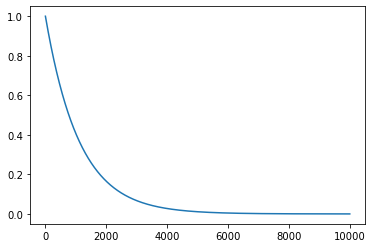

In [12]:
plt.plot(time, epsilon)
plt.show()